## Brief description of the notebook

    In This notebook ,we study the distribution of the data whether if its normal or not.
     For threshold definition we rely on chebyshev inequality applied on each of our two datasets saas data and rabbitmq
     the dataset saas is the output of our previous processing and aggregation of features (notebook SaasV2Visualization&DatafraGeneration)
     the dataset rabbitMQ is the output of our previous processing and aggregation of features (notebook RabbitMQV2Visualization&Generation)
 

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy.stats import kstest, norm


In [2]:
%matplotlib inline
np.random.seed = 0

## SaaS Data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000266C1440D88>]],
      dtype=object)

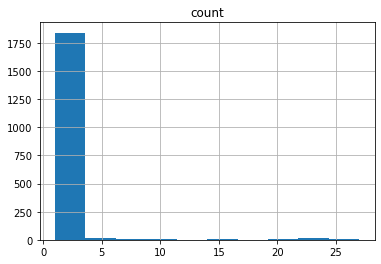

In [3]:
df_saas =pd.read_csv("saas.csv",parse_dates=['timestamp'] ,
                       index_col=['timestamp'])#comment if timestamp indexing not wanted
my_data = df_saas[['count']]
my_data.hist()


# Stats
### Seasonality, autocorrelation ...


In [4]:
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import  plot_acf


## checks for stationarity 

### Look at plots

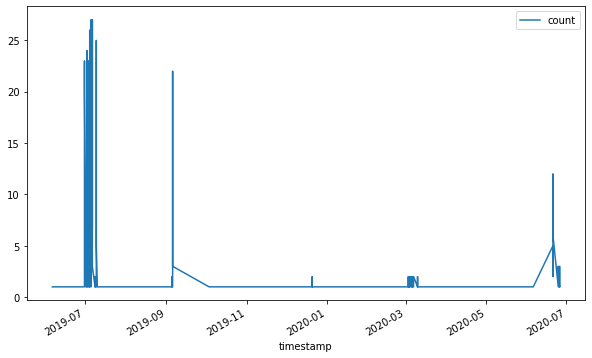

In [5]:
my_data.plot(figsize=(10,6))
pyplot.show()

### Summary Stats

     
     review the summary statistics for your data for seasons or random partitions and check for obvious or significant differences.
      
      the idea is to split the time series into two (or more) partitions and compare the mean and variance of each group. If they differ and the difference is statistically significant, the time series is likely non-stationary.

In [7]:
X = my_data.values
split = round(len(X) / 2)
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

mean1=2.052521, mean2=1.920168
variance1=16.377494, variance2=0.731022


Running the example, we can see the mean and variance look very different.

We have a non-stationary time series.

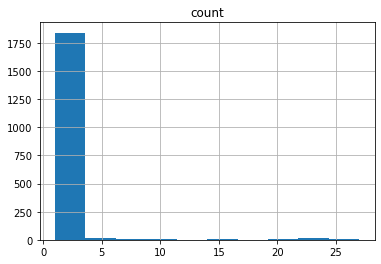

In [8]:
my_data.hist()
pyplot.show()


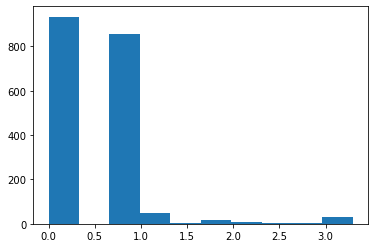

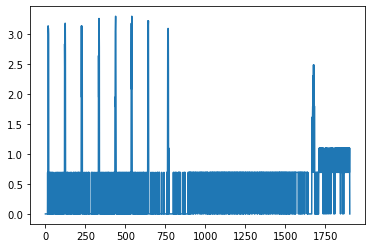

In [9]:
from numpy import log
X = log(X)
pyplot.hist(X)
pyplot.show()
pyplot.plot(X)
pyplot.show()

In [10]:
#We can now calculate the mean and standard deviation of the values of the log transformed dataset.

split = round(len(X) / 2)
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))



mean1=0.266497, mean2=0.587730
variance1=0.427253, variance2=0.121880


In [11]:
X.mean()

0.42711366345329893

Running the examples shows mean and standard deviation values for each group 
that are not similar,

Perhaps, from these numbers alone, we would say the time series is not stationary, but we strongly 
believe this to not be the case from reviewing the line plot.

In [12]:

from statsmodels.tsa.stattools import adfuller
X = my_data.values

result = adfuller(X,12)

print('ADF Statistic WITH SAAS DATA: %f' % result[0])
print('ADF usedlag : %f ' % result[2])
print('p-value: %f' % result[1])
print('Critical Values:') #Critical values for the test statistic at the 1 %, 5 %, and 10 % levels. Based on MacKinnon (2010)
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic WITH SAAS DATA: -12.936041
ADF usedlag : 8.000000 
p-value: 0.000000
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


Running the example prints the test statistic value of -12. 
The more negative this statistic, the more likely we are to reject the null hypothesis
(we have a stationary dataset).

As part of the output, we get a look-up table to help determine the ADF statistic.
We can see that our statistic value of -12 is less than the value of -3.434 at 1%.

This suggests that we can reject the null hypothesis H0 with a significance level of less than 1%
    
        H1 verified
(i.e. a low probability that the result is a statistical fluke).

Rejecting the null hypothesis means that the process has no unit root, 
and in turn that the time series is stationary ; does not have time-dependent structure.


    *important*
 
 adfuller p-value is lower than a certain specified alpha (i.e.: 5%), then you may reject the null hypothesis (Ho), because the probability of getting a p-value as low as that by mere luck (random chance) is very unlikely.

Once the Ho is rejected, the alternative hypothesis (Ha) can be accepted, which in this case would be: the residue series is stationary.

Here is the hypothesis relation for you:

Ho: the series is not stationary, it presents heterocedasticity. In another words, your residue depends on itself (i.e.: yt depends on yt-1, yt-1 depends on yt-2 ..., and so on)

Ha: the series is stationary (That is normally what we desire in regression analysis). Nothing more is needed to be done.

its important that the time series data becomes stationary for use with statistical modeling methods and even some modern machine learning methods



We can see that the function is careful to begin the differenced dataset after the specified interval to ensure differenced values can, in fact, be calculated. A default interval or lag value of 1 is defined. This is a sensible default.

One further improvement would be to also be able to specify the order or number of times to perform the differencing operation.

The example below applies the manual difference() function to the Shampoo Sales dataset.

## Automatic Differencing

Running the example prints the test statistic value of -14. 
The more negative this statistic, the more likely we are to reject the null hypothesis
(we have a stationary dataset).

As part of the output, we get a look-up table to help determine the ADF statistic.
We can see that our statistic value of -12 is less than the value of -3.434 at 1%.

This suggests that we can reject the null hypothesis H0 with a significance level of less than 1%
    
        H1 verified
(i.e. a low probability that the result is a statistical fluke).

Rejecting the null hypothesis means that the process has no unit root, 
and in turn that the time series is stationary ; does not have time-dependent structure.

### Autocorrelation ,partial_correlation

### Autocorrelation

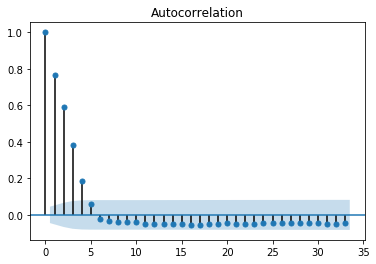

In [14]:
plot_acf(my_data)
pyplot.show()

### partial correlation

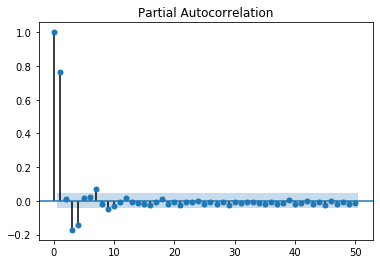

In [15]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(my_data, lags=50)
pyplot.show()

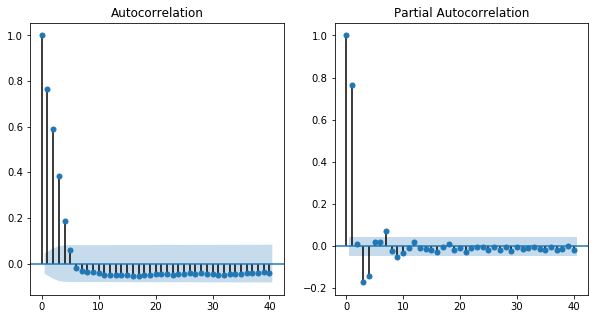

In [16]:
import statsmodels.api as sm

fig, ax = plt.subplots(1,2,figsize=(10,5))
sm.graphics.tsa.plot_acf(my_data.values.squeeze(), lags=40, ax=ax[0])
sm.graphics.tsa.plot_pacf(my_data.values.squeeze(), lags=40, ax=ax[1])
plt.show()

### normality test, chebyshev rule and threshold

In [17]:
print("saas data normality test")
ks_statistic, p_value = kstest(my_data, 'norm')
print("ks_statistic " ,ks_statistic)
print("p_value " ,p_value)

saas data normality test
ks_statistic  1.0
p_value  0.0


    The Test Statistic of the KS Test is the Kolmogorov Smirnov Statistic, which follows a 
    Kolmogorov distribution if the null hypothesis is true.

    If the observed data perfectly follow a normal distribution, the value of the KS statistic will be 0.
    The P-Value is used to decide whether the difference is large enough to reject the null hypothesis

    If the P-Value of the KS Test is larger than 0.05, we assume a normal distribution
    If the P-Value of the KS Test is smaller than 0.05, we do not assume a normal distribution

# Theory

http://www.math.uni.edu/~campbell/stat/normfact.html

Understanding what the normal distribution means is enhanced by being familiar with a few z-scores and their associated areas.

    If we cannot assume that most of our data (of business, social, economic, or scientific origin) 
    are at least approximately ‘Normal’ (i.e. they are generated by a Gaussian process or by a sum 
                                         of multiple such processes), then we are doomed!



Here is an extremely brief list of things that will not be valid,

    The whole concept of six-sigma
    The famous 68–95–99.7 rule
    The ‘holy’ concept of p=0.05 (comes from 2 sigma interval) in statistical analysis
    
    All these calculations are based on the implicit assumption that the population data (NOT the sample) follows Gaussian distribution i.e. the fundamental process, from which all the data has been generated (in the past and at the present), is governed by the normal distribution pattern on the left side.
    
   <  https://miro.medium.com/max/875/1*JYuPTKLwpzdrGjR6_Qezvg.png >

## “Chebyshev Bound”.

Is there a more universal bound when the data is NOT Normal?

At the end of the day, we will still need a mathematically sound technique to quantify our confidence bound, even if the data is not normal. That means, our calculation may change a little, but we should still be able to say something like this-

    “The probability of observing a new data point at a certain distance from the average is such and such…”

Obviously, we need to seek a more universal bound than the cherished Gaussian bounds of 68–95–99.7 (corresponding to 1/2/3 standard deviations distance from the mean).

Fortunately, there is one such bound called “Chebyshev Bound”.

What is Chebyshev Bound and how is it useful?

Chebyshev’s inequality (also called the Bienaymé-Chebyshev inequality) guarantees that, for a wide class of probability distributions, no more than a certain fraction of values can be more than a certain distance from the mean.

    Specifically, no more than 1/k² of the distribution’s values can be more than k standard deviations away from the mean (or equivalently, at least 1−1/k² of the distribution’s values are within k standard deviations of the mean).

It applies to virtually unlimited types of probability distributions and works on a much more relaxed assumption than Normality.

How does it work?

Even if you don’t know anything about the secret process behind your data, there is a good chance you can say the following,

“I am confident that 75% of all data should fall within 2 standard deviations away from the mean”,

Or,

I am confident that 89% of all data should fall within 3 standard deviations away from the mean”.

Here is what it looks like for an arbitrary looking distribution,
Image for post
Image for post
Image Credit: https://2012books.lardbucket.org/books/beginning-statistics/s06-05-the-empirical-rule-and-chebysh.html
How to apply it?

As you can guess by now, the basic mechanics of your data analysis does not need to change a bit. You will still gather a sample of the data (larger the better), compute the same two quantities that you are used to calculating — mean and standard deviation, and then apply the new bounds instead of 68–95–99.7 rule.
Image for post
Image for post

The table looks like following (here k denotes that many standard deviations away from the mean),
Image for post
Image for post
Image: https://en.wikipedia.org/wiki/Chebyshev%27s_inequality

# Simple descriptive statistics

In [18]:
my_data.describe()

,count
count,1904.000000
mean,1.986345
std,2.926283
min,1.000000
25%,1.000000
50%,2.000000
75%,2.000000
max,27.000000


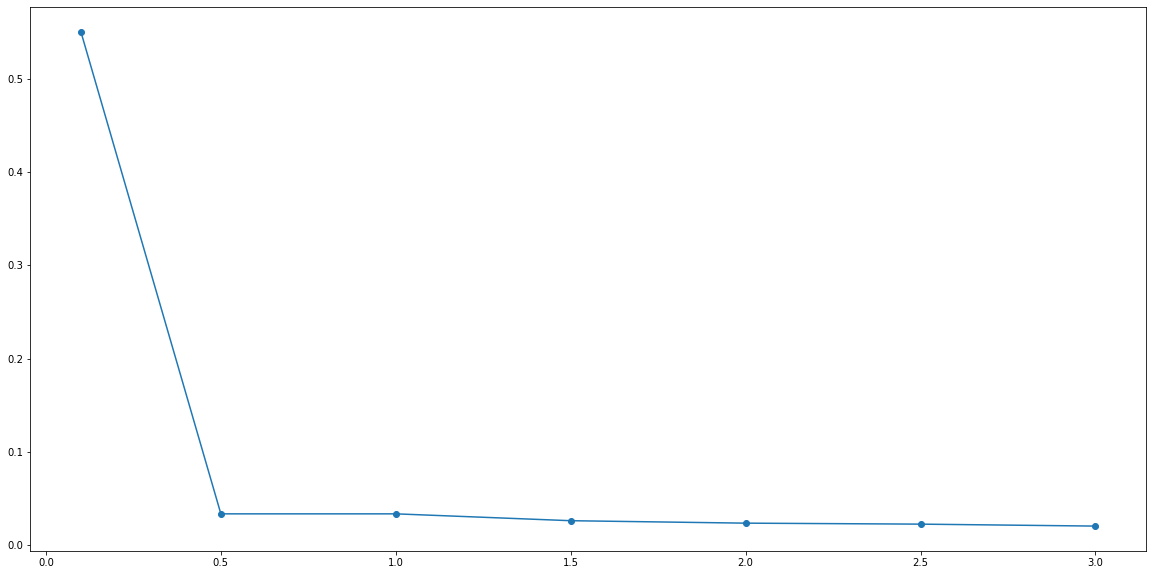

Probability of a sample far from mean more than k standard deviation:
k:0.1, probability: 0.550 | :(1/k²) 99.99
k:0.5, probability: 0.033 | :(1/k²) 4.0
k:1.0, probability: 0.033 | :(1/k²) 1.0
k:1.5, probability: 0.026 | :(1/k²) 0.444
k:2.0, probability: 0.023 | :(1/k²) 0.25
k:2.5, probability: 0.022 | :(1/k²) 0.16
k:3.0, probability: 0.020 | :(1/k²) 0.111


In [19]:
# 1.compute mean and std
#2.Apply chebyshev bound


import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

a = np.array(my_data['count'])

mu = np.mean(a)


sigma = np.std(a, dtype=np.float64)


# set k
ks = [ 0.1, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0]

# prob list
probs = []

# sample size
s = my_data.size

# for each k
for k in ks: 
    # start count
    c = 0
    # for each data sample
    for i in a:
        # count if far from mean in k standard deviation
        if abs(i - mu) > k * sigma :
            c += 1
    # probability of sample has a distance from an expected value larger than k standrad deviation
    probs.append(c/s)

# set figure size.
plt.figure(figsize=(20,10))
# plot each probability.
plt.plot(ks,probs, marker='o')
# show plot.
plt.show()

# print each probability
print("Probability of a sample far from mean more than k standard deviation:")
for i, prob in enumerate(probs):
    print("k:" + str(ks[i]) + ", probability: " \
          + str(prob)[0:5] + \
          " | :(1/k²) " \
          + str(1/ks[i]**2)[0:5])

From the plot and result, we can see that as the k increases,
the probability is decreasing, and the probability of each k follows the inequality.
Moreover, only the case that k is larger than 1 is useful. If k is less than 1,
the right side of the inequality is larger than 1 which is not useful because 
the probability cannot be larger than 1.

We can use Chebyshev’s inequality in many applications, 
we can estimate a probability that data will fall in a range of k standard deviations. 
For example, there is a 80% chance that the a sample will be within a range of 3 standard deviations.

    chebyshev inequality states a fact that is true for many probability distributions.
    For two standard deviations, it states that three-fourths of the data items will lie within two 
    standard deviations from the mean. 
       Chebyshev's inequality is an absolute bound that is met by practically all distributions.
  

In [20]:
def Chebyshev_inequality(num_std_deviations):
    return 1 - 1 / num_std_deviations**2
#in other words/terms, (1 - 1/k²) of the distribution's values should be within k std of the mean 
sigma #(standard variation )
mu # (mean of our count data)
print('Limite sup ', mu+ (2*sigma))
print('Limite inf ',mu- (2*sigma))

Limite sup  7.837374210535744
Limite inf  -3.8646851349054914



In our case: the inequality says that about 75% of the data items will lie within 2 standard 
deviations of the mean, which means more than mean - 2 *std and less than  mean + 2 * std 
(note the different signs), 
which simplifies to the interval:

    [-3.8646851349054914, 7.837374210535744]


In [21]:
def find_anomalies(random_data):
    sigma = np.std(random_data)
    mu = np.mean(random_data)
    print('DATA MEAN :')
    print(mu)
    print('  STD : ')
    print(sigma)
    
    # Set upper and lower limit to 2 standard deviation
    print("")
    print('upper  value')
    upper_limit = mu+ (2*sigma)
    print(upper_limit)
    print('lower value')
    lower_limit = mu- (2*sigma)
    print(lower_limit)
    
    # Find outliers
    anomalies = []
    for outlier in random_data:
        if outlier > upper_limit or outlier < lower_limit:
            anomalies.append(outlier)
    return upper_limit,anomalies

In [22]:
lim , anom = find_anomalies(my_data['count'] )


DATA MEAN :
1.986344537815126
  STD : 
2.9255148363602306

upper  value
7.837374210535588
lower value
-3.864685134905335


In [23]:
print("---------------------------------------------")
print("")
print(' Events outside of the upper limit per user_id+clients per seconds-min-hour-day-month:  ')
evt_anom = my_data[ my_data['count'] > lim ]
evt_anom

#uncomment for further details about the data>threshold
#evt_anom =  df_saas[  df_saas['count'] > lim ]
#evt_anom

---------------------------------------------

 Events outside of the upper limit per user_id+clients per seconds-min-hour-day-month:  


,count
timestamp,
2019-06-30 20:02:15,22
2019-06-30 20:02:16,23
2019-06-30 20:02:17,22
2019-06-30 20:02:18,22
2019-06-30 20:02:19,20
2019-07-02 20:02:10,17
2019-07-02 20:02:11,11
2019-07-02 20:02:12,21
2019-07-02 20:02:13,24


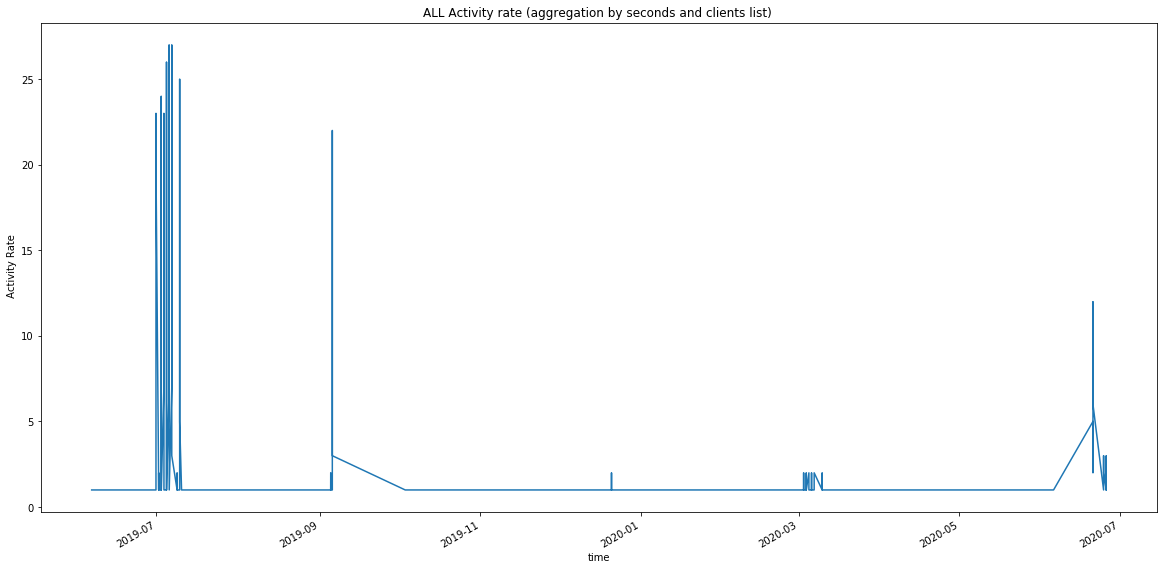

In [24]:

#plotting the count graphic/ figure 
my_data['count'].plot(#kind='line',
             figsize=(20, 10), # pass a tuple (x, y) size
             )

plt.title('ALL Activity rate (aggregation by seconds and clients list) ')
plt.ylabel(' Activity Rate')
plt.xlabel('time')

plt.show() 

In [25]:
x = my_data['count']
x


timestamp
2019-06-06 09:43:21    1
2019-06-24 06:29:17    1
2019-06-24 20:02:12    1
2019-06-24 20:46:40    1
2019-06-25 20:02:09    1
                      ..
2020-06-25 20:56:51    3
2020-06-25 20:56:52    2
2020-06-25 20:56:53    2
2020-06-25 20:56:54    3
2020-06-25 20:56:55    1
Name: count, Length: 1904, dtype: int64

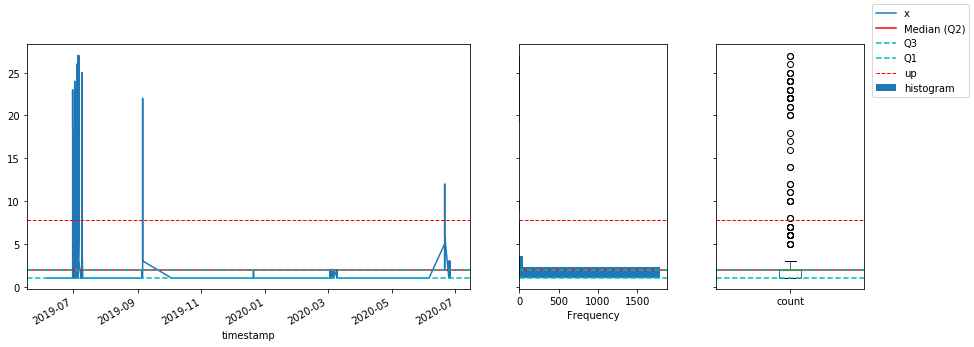

In [26]:
fig, axes = plt.subplots(1,3, figsize=(15,5), sharey=True, gridspec_kw={'width_ratios': [3, 1, 1]})
# time plot with median Q1 and Q3 displayed

x.plot(ax=axes[0], label='x')
axes[0].axhline(x.median(), color='r', label='Median (Q2)')
axes[0].axhline(x.quantile(0.25), color='c', linestyle='--', label='Q3')
axes[0].axhline(x.quantile(0.75), color='c', linestyle='--', label='Q1')
axes[0].axhline(lim, color='r', linestyle='--', linewidth=1, label='up')
#axes[0].axhline(down_limit, color='r', linestyle='--', linewidth=1, label='down')

# histogram
x.plot.hist(bins=20, orientation=u'horizontal', ax=axes[1], label='histogram')
axes[1].axhline(x.median(), color='r')
axes[1].axhline(x.quantile(0.25), color='c', linestyle='--')
axes[1].axhline(x.quantile(0.75), color='c', linestyle='--')
axes[1].axhline(lim, color='r', linestyle='--', linewidth=1)
#axes[1].axhline(down_limit, color='r', linestyle='--', linewidth=1)

# boxplot
x.plot.box(ax=axes[2])
axes[2].axhline(x.median(), color='r')
axes[2].axhline(x.quantile(0.25), color='c', linestyle='--')
axes[2].axhline(x.quantile(0.75), color='c', linestyle='--')
axes[2].axhline(lim, color='r', linestyle='--', linewidth=1)
#axes[2].axhline(down_limit, color='r', linestyle='--', linewidth=1)
fig.legend();

le 1er quartile est la donnée de la série qui sépare les 25 % inférieurs des données (notation Q1) ;
le 2e quartile est la donnée de la série qui sépare les 50 % inférieurs des données (notation Q2) ; il est également appelé médiane ;
le 3e quartile est la donnée de la série qui sépare les 75 % inférieurs des données (notation Q3) 

La différence entre le troisième quartile et le premier quartile s'appelle écart interquartile ;
 c'est un critère de dispersion de la série. 


## RabbitMQ DATASET

In [27]:
df_mq =pd.read_csv("RabbitMQ.csv",parse_dates=['timestamp'] ,
                       index_col=['timestamp'])#comment if timestamp indexing not wanted
my_data2 = df_mq[['count']]

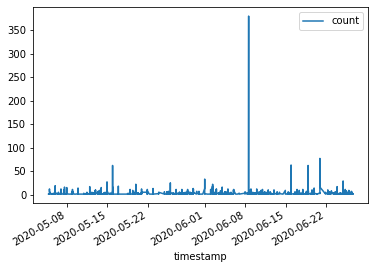

In [28]:
# Look at plots
my_data2.plot()
pyplot.show()

In [29]:
## Summary Stats

In [30]:
max(my_data2.values)

array([380], dtype=int64)

## Stats

In [31]:
X = my_data2.values
split = round(len(X) / 2)
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

mean1=4.819250, mean2=5.520905
variance1=9.602933, variance2=149.775824


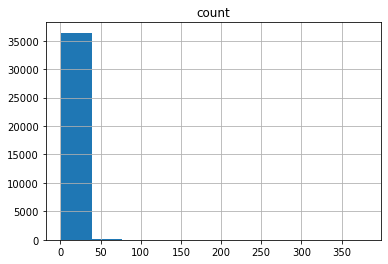

In [32]:
my_data2.hist()
pyplot.show()

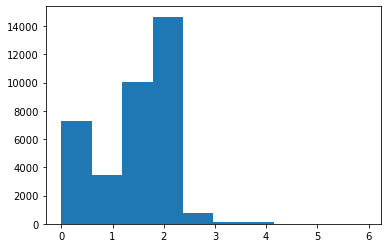

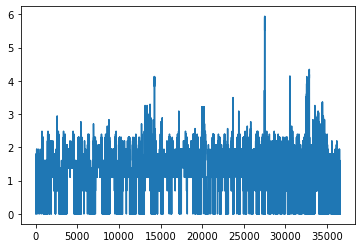

In [33]:
from numpy import log
X = log(X)
pyplot.hist(X)
pyplot.show()
pyplot.plot(X)
pyplot.show()

In [34]:
#We can now calculate the mean and standard deviation of the values of the log transformed dataset.

split = round(len(X) / 2)
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))


mean1=1.374235, mean2=1.324697
variance1=0.491636, variance2=0.697283


### Augmented Dickey-Fuller test
The Augmented Dickey-Fuller test is a type of statistical test called a unit root test.

The intuition behind a unit root test is that it determines how strongly a time series is defined by a trend.

There are a number of unit root tests and the Augmented Dickey-Fuller may be one of the more widely used. It uses an autoregressive model and optimizes an information criterion across multiple different lag values.

The null hypothesis of the test is that the time series can be represented by a unit root, that it is not stationary (has some time-dependent structure). The alternate hypothesis (rejecting the null hypothesis) is that the time series is stationary.

    Null Hypothesis (H0): If failed to be rejected, it suggests the time series has a unit root, meaning it is non-stationary. It has some time dependent structure.
    Alternate Hypothesis (H1): The null hypothesis is rejected; it suggests the time series does not have a unit root, meaning it is stationary. It does not have time-dependent structure.


We interpret this result using the p-value from the test. A p-value below a threshold (such as 5% or 1%) suggests we reject the null hypothesis (stationary), otherwise a p-value above the threshold suggests we fail to reject the null hypothesis (non-stationary).

    p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.
    p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.


In [35]:
X = my_data2.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:') #Critical values for the test statistic at the 1 %, 5 %, and 10 % levels. Based on MacKinnon (2010)
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -21.726961
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


Running the example prints the test statistic value of -12. The more negative this statistic, the more likely we are to reject the null hypothesis (we have a stationary dataset).

As part of the output, we get a look-up table to help determine the ADF statistic. We can see that our statistic value of -12 is less than the value of -3.434 at 1%.

This suggests that we can reject the null hypothesis H0 with a significance level of less than 1%

    H1 verified

(i.e. a low probability that the result is a statistical fluke).

Rejecting the null hypothesis means that the process has no unit root, and in turn that the time series is stationary ; does not have time-dependent structure.


## normality test, chebyshev rule and threshold

RabbitMQ data normality test
ks_statistic  1.0
p_value  0.0


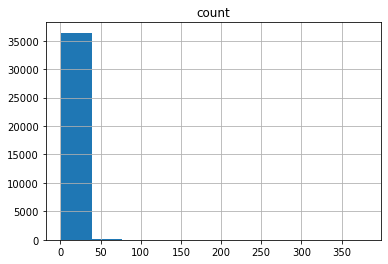

In [36]:

my_data2.hist()

print("RabbitMQ data normality test")
ks_statistic, p_value = kstest(my_data2, 'norm')
print("ks_statistic " ,ks_statistic)
print("p_value " ,p_value)

    The Test Statistic of the KS Test is the Kolmogorov Smirnov Statistic, which follows a 
    Kolmogorov distribution if the null hypothesis is true.

    If the observed data perfectly follow a normal distribution, the value of the KS statistic will be 0.
    The P-Value is used to decide whether the difference is large enough to reject the null hypothesis

    If the P-Value of the KS Test is larger than 0.05, we assume a normal distribution
    If the P-Value of the KS Test is smaller than 0.05, we do not assume a normal distribution

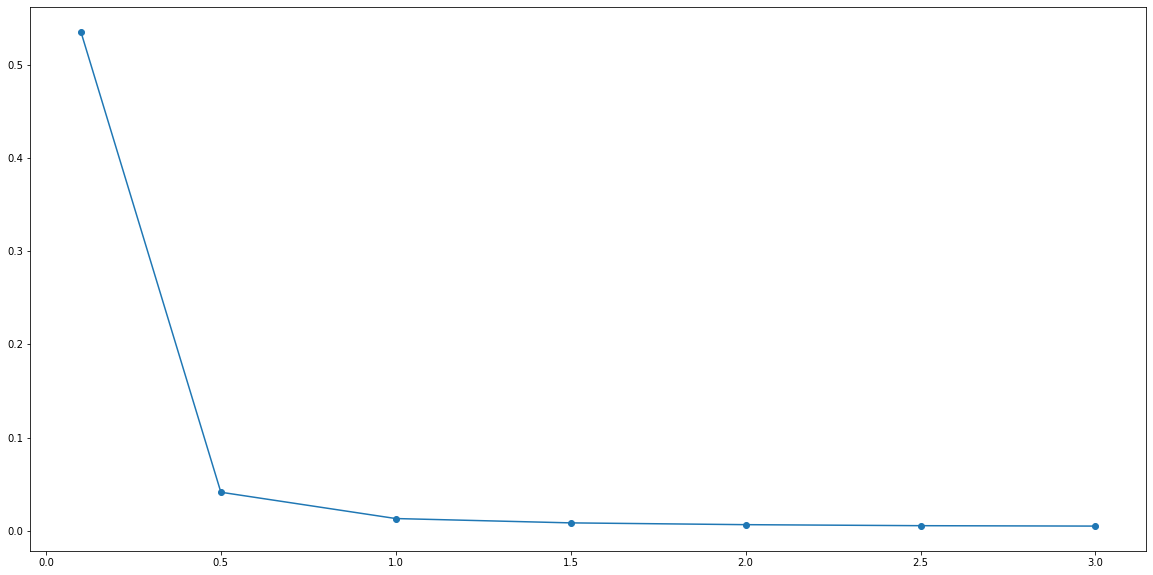

Probability of a sample far from mean more than k standard deviation:
k:0.1, probability: 0.534 | :(1/k²) 99.99
k:0.5, probability: 0.041 | :(1/k²) 4.0
k:1.0, probability: 0.013 | :(1/k²) 1.0
k:1.5, probability: 0.008 | :(1/k²) 0.444
k:2.0, probability: 0.006 | :(1/k²) 0.25
k:2.5, probability: 0.005 | :(1/k²) 0.16
k:3.0, probability: 0.005 | :(1/k²) 0.111


In [37]:

a = np.array(my_data2['count'])

mu = np.mean(a)


sigma = np.std(a, dtype=np.float64)


# set k
ks = [ 0.1, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0]

# prob list
probs = []

# sample size
s = my_data2.size

# for each k
for k in ks: 
    # start count
    c = 0
    # for each data sample
    for i in a:
        # count if far from mean in k standard deviation
        if abs(i - mu) > k * sigma :
            c += 1
    # probability of sample has a distance from an expected value larger than k standrad deviation
    probs.append(c/s)

# set figure size.
plt.figure(figsize=(20,10))
# plot each probability.
plt.plot(ks,probs, marker='o')
# show plot.
plt.show()

# print each probability
print("Probability of a sample far from mean more than k standard deviation:")
for i, prob in enumerate(probs):
    print("k:" + str(ks[i]) + ", probability: " \
          + str(prob)[0:5] + \
          " | :(1/k²) " \
          + str(1/ks[i]**2)[0:5])

From the plot and result, we can see that as the k increases,
the probability is decreasing, and the probability of each k follows the inequality.
Moreover, only the case that k is larger than 1 is useful. If k is less than 1,
the right side of the inequality is larger than 1 which is not useful because 
the probability cannot be larger than 1.

We can use Chebyshev’s inequality in many applications, 
we can estimate a probability that data will fall in a range of k standard deviations. 
For example, there is a 80% chance that the a sample will be within a range of 3 standard deviations.

In [38]:
lim2 , anom2 = find_anomalies(my_data2['count'] )


DATA MEAN :
5.170087175142787
  STD : 
8.933889058907841

upper  value
23.037865292958468
lower value
-12.697690942672896


In [39]:
print("---------------------------------------------")
print("")
print(' Events outside of the upper limit per event_type header node and seconds rate:  ')
evt_anom = my_data2[ my_data2['count'] > lim2 ]
evt_anom

#uncomment for further details about the data>threshold
#evt_anom =  df_saas[  df_saas['count'] > lim ]
#evt_anom

---------------------------------------------

 Events outside of the upper limit per event_type header node and seconds rate:  


,count
timestamp,
2020-05-14 22:46:28,26
2020-05-14 22:48:28,26
2020-05-14 22:51:29,27
2020-05-15 22:02:12,59
2020-05-15 22:02:13,62
...,...
2020-06-20 22:03:14,50
2020-06-24 22:46:35,26
2020-06-24 22:54:01,28


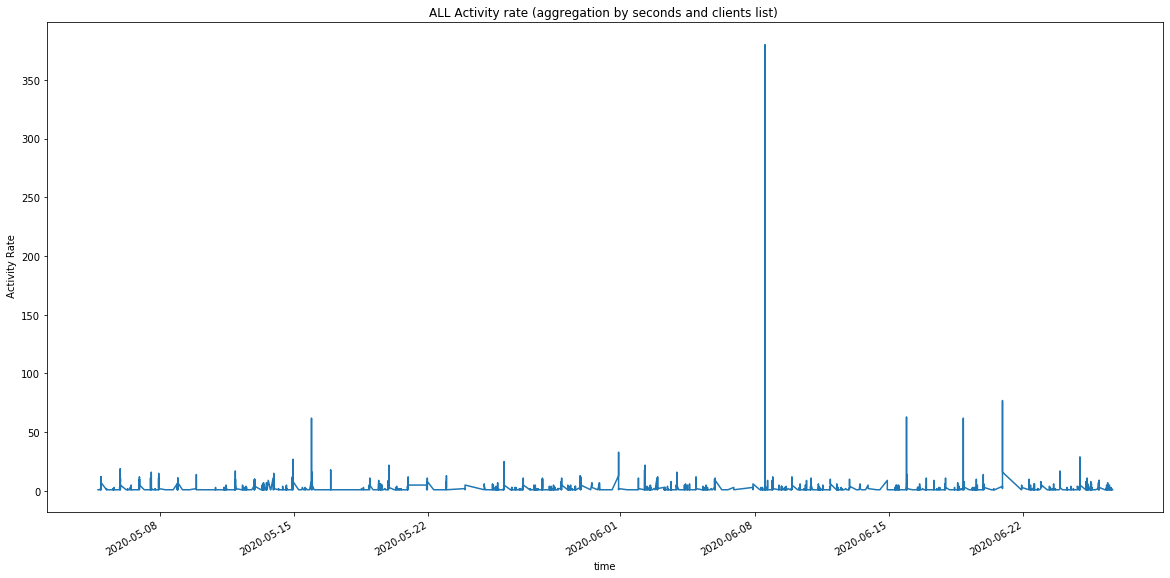

In [40]:

#plotting the count graphic/ figure 
my_data2['count'].plot(#kind='line',
             figsize=(20, 10), # pass a tuple (x, y) size
             )

plt.title('ALL Activity rate (aggregation by seconds and clients list) ')
plt.ylabel(' Activity Rate')
plt.xlabel('time')

plt.show() 

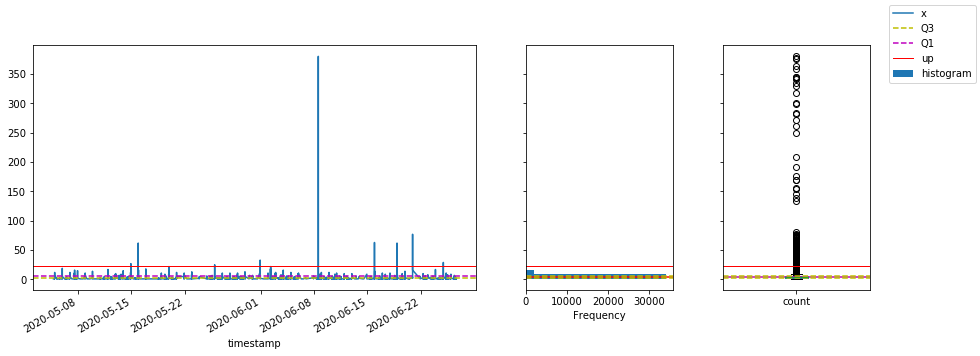

In [41]:
fig, axes = plt.subplots(1,3, figsize=(15,5), sharey=True, gridspec_kw={'width_ratios': [3, 1, 1]})
# time plot with median Q1 and Q3 displayed
x2 = my_data2['count']

# time plot with median Q1 and Q3 displayed
x2.plot(ax=axes[0], label='x')
#axes[0].axhline(x.median(), color='r', label='Median (Q2)')
axes[0].axhline(x2.quantile(0.25), color='y', linestyle='--', label='Q3')
axes[0].axhline(x2.quantile(0.75), color='m', linestyle='--', label='Q1')
axes[0].axhline(lim2, color='r', linestyle='-', linewidth=1, label='up')
# histogram
x2.plot.hist(bins=50, orientation=u'horizontal', ax=axes[1], label='histogram')
axes[1].axhline(x2.median(), color='r')
axes[1].axhline(x2.quantile(0.25), color='y', linestyle='--')
axes[1].axhline(x2.quantile(0.75), color='y', linestyle='--')
axes[1].axhline(lim2, color='r', linestyle='-', linewidth=1)

# boxplot
x2.plot.box(ax=axes[2])
axes[2].axhline(x2.median(), color='m')
axes[2].axhline(x2.quantile(0.25), color='y', linestyle='--')
axes[2].axhline(x2.quantile(0.75), color='y', linestyle='--')
axes[2].axhline(lim2, color='r', linestyle='-', linewidth=1)
fig.legend();